<a href="https://colab.research.google.com/github/RifqiMakarim/MachineLearning_Asah_Dicoding/blob/main/Flood_Predictions_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA LOADING
---
---

In [ ]:
import pandas as pd

df_train = pd.read_csv('/content/drive/MyDrive/FOR GO-COLAB/Dataset_floodPrediction/train.csv')
df_train

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/FOR GO-COLAB/Dataset_floodPrediction/test.csv')
df_test

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,1863257,5,4,8,3,5,4,4,5,5,...,5,6,1,3,5,6,4,4,6,6
745301,1863258,4,4,2,12,4,3,4,3,5,...,3,7,4,4,3,5,5,3,5,4
745302,1863259,5,7,9,5,5,6,7,5,5,...,6,11,3,11,4,5,9,5,5,4
745303,1863260,4,7,6,3,5,2,3,8,6,...,6,6,8,6,2,3,8,7,5,5


DATA CLEANING AND TRANSFORMATION
---
---

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

- Melakukan statistik deskriptif dari dataset

In [ ]:
df_train.describe(include='all')

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


- Melakukan pemeriksaan missing value pada data

In [ ]:
missing_value = df_train.isnull().sum()
missing_value[missing_value > 0]

,0


- Mengatasi Outliers dengan menggunakan Metode IQR
, IQR adalah rentang antara kuartil pertama dan kuartil ketiga dalam data

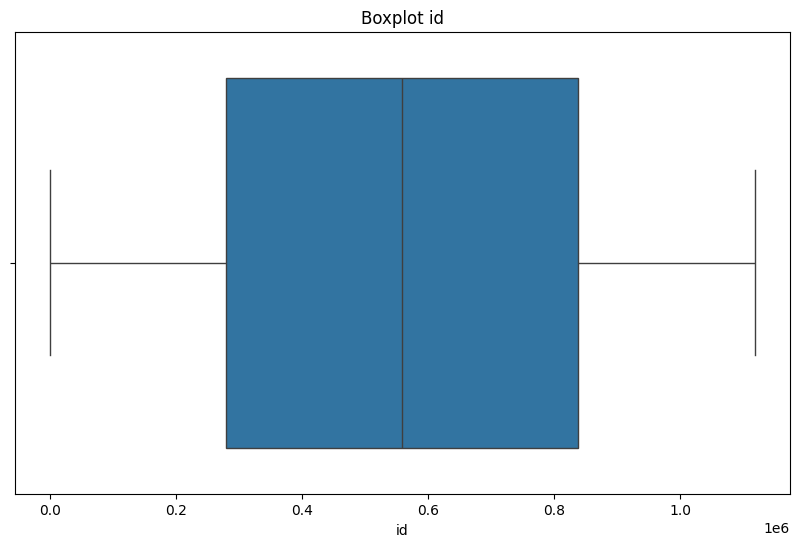

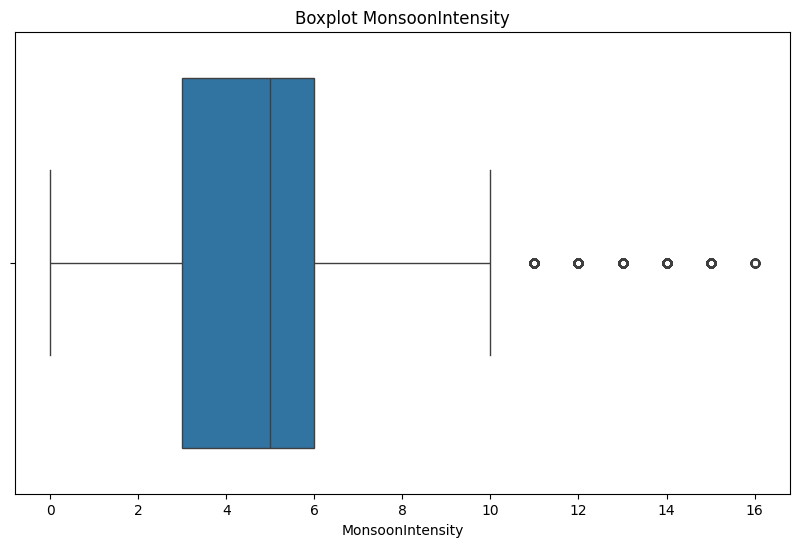

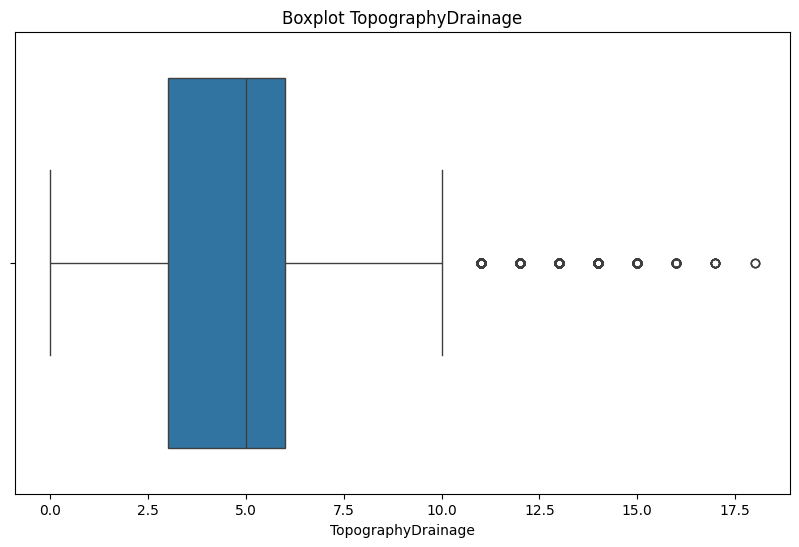

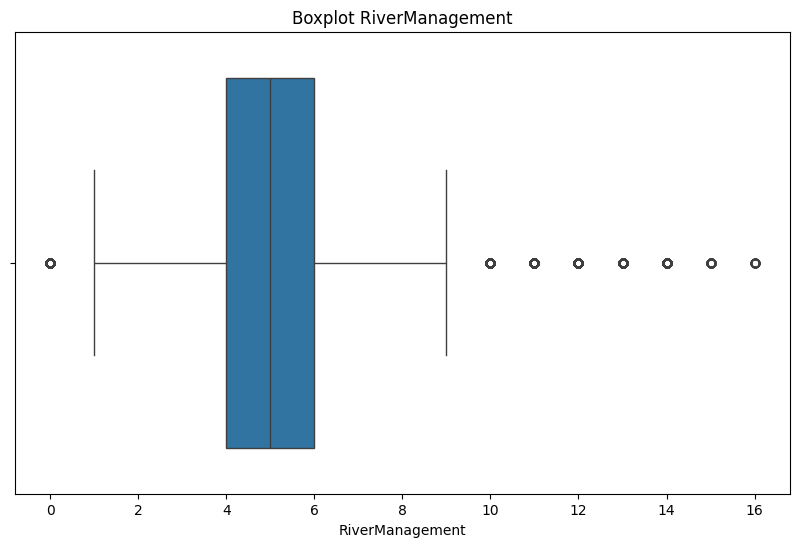

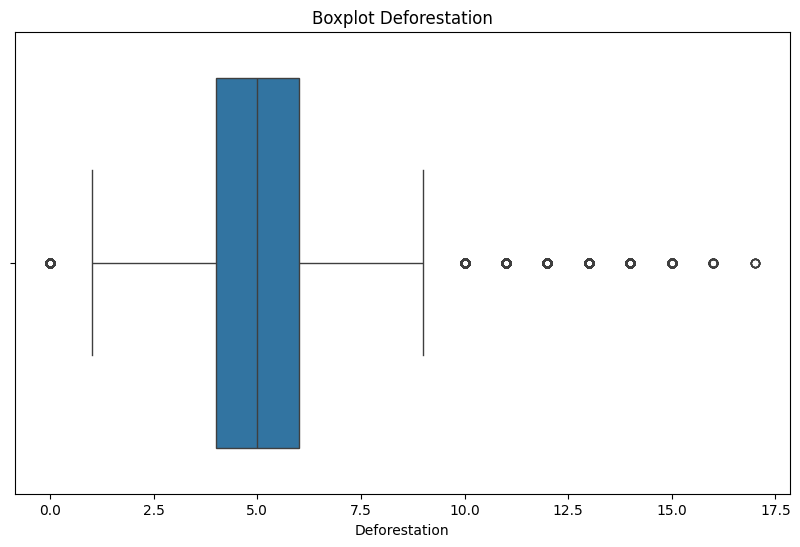

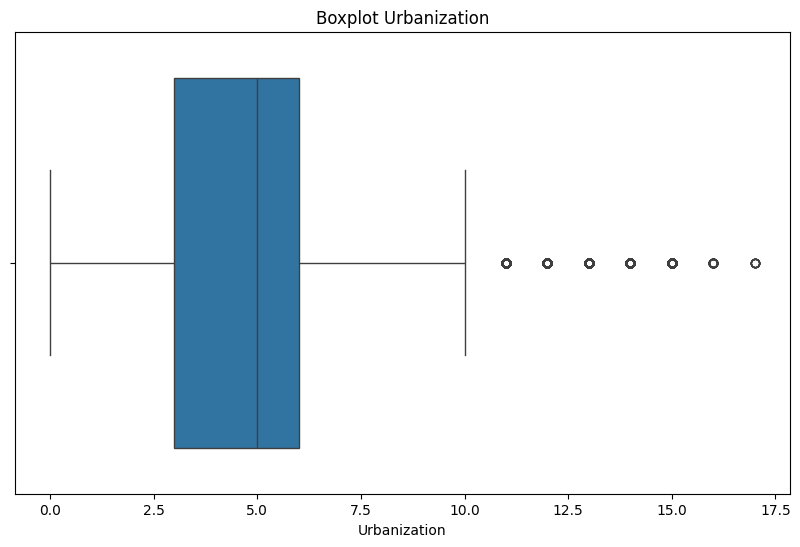

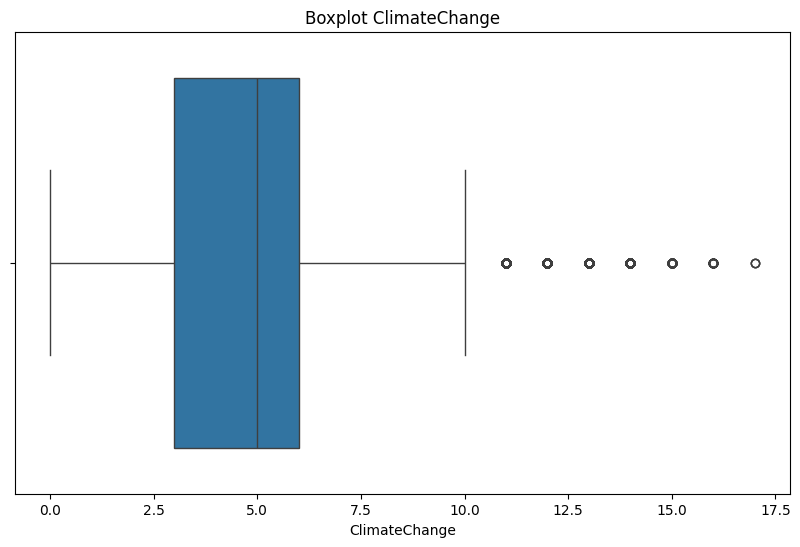

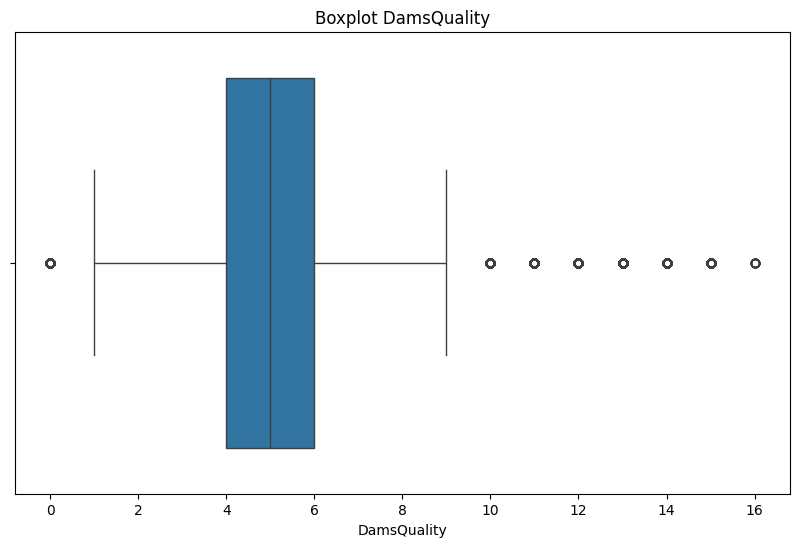

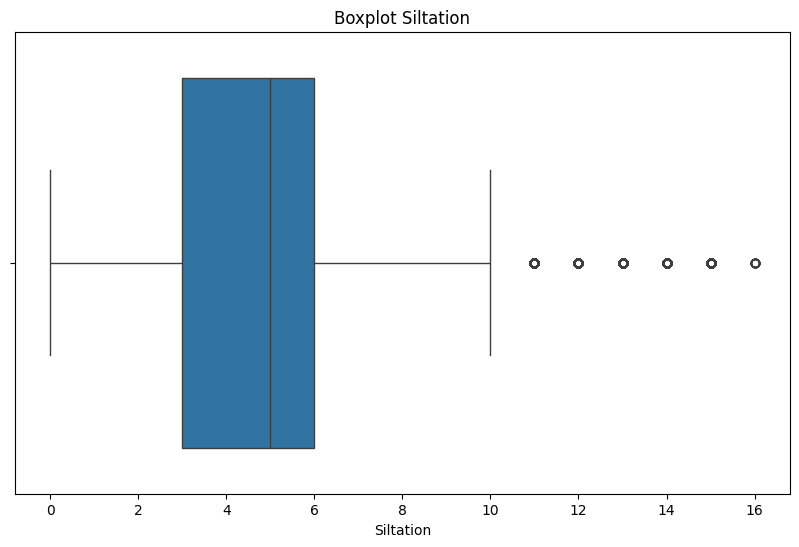

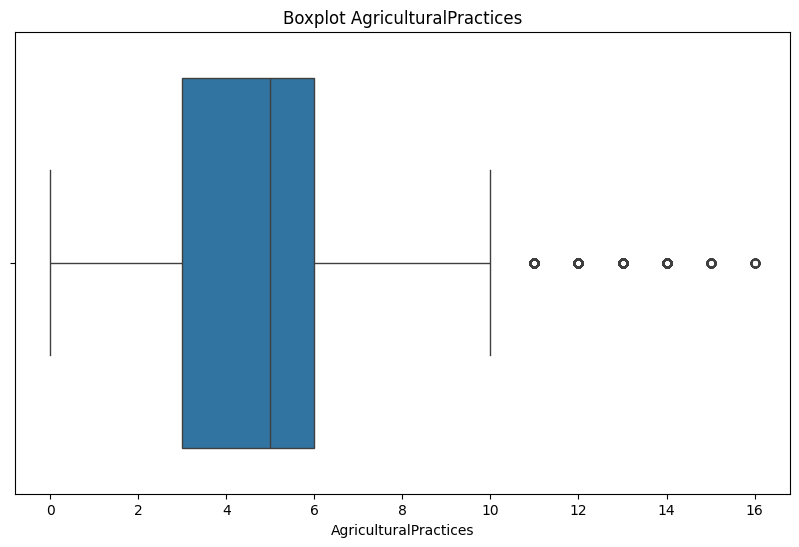

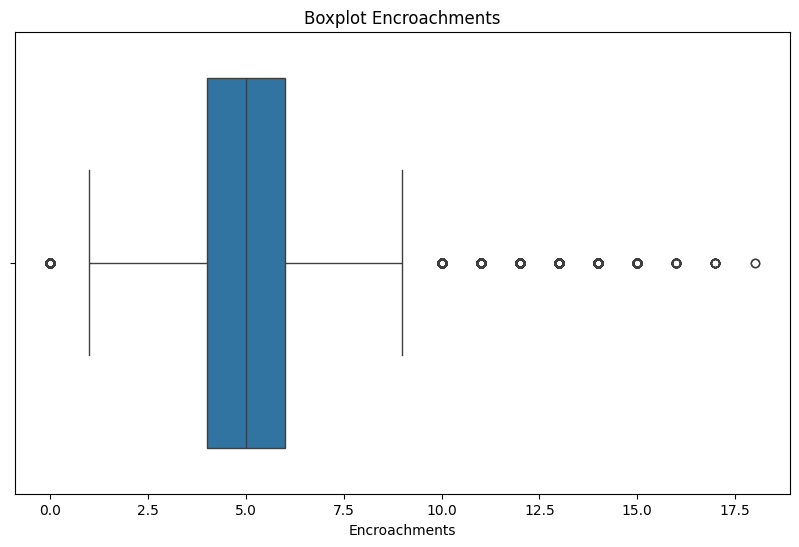

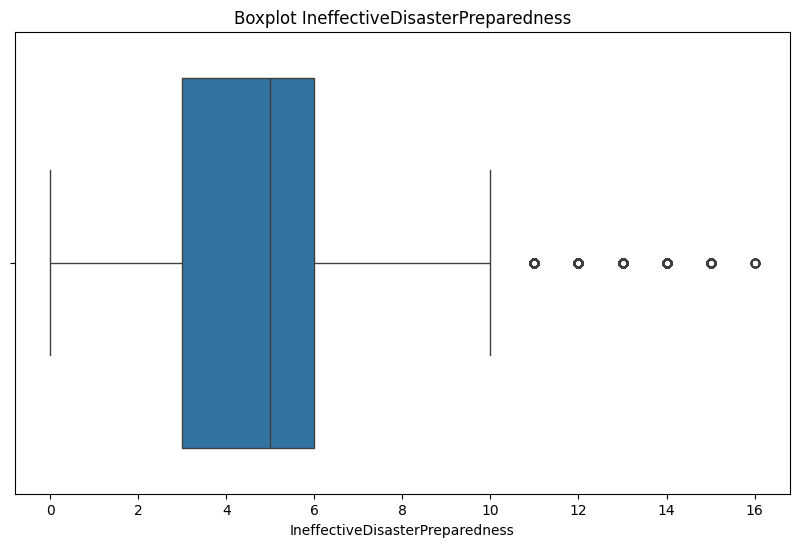

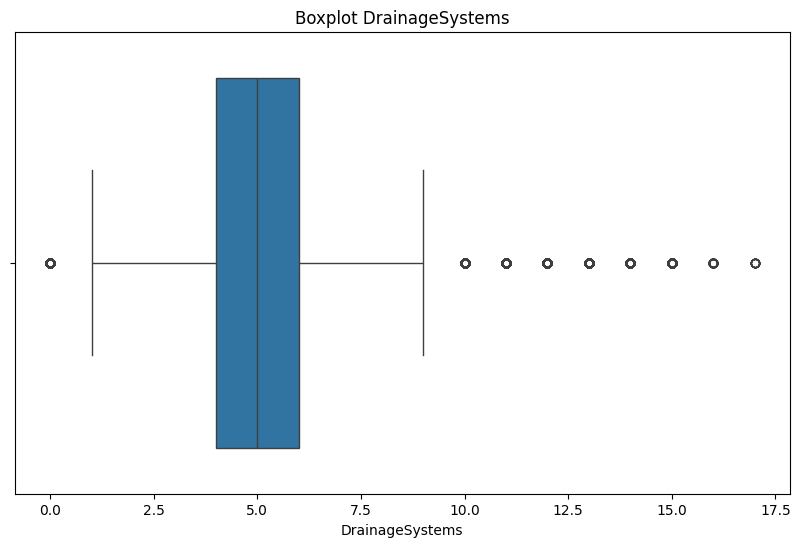

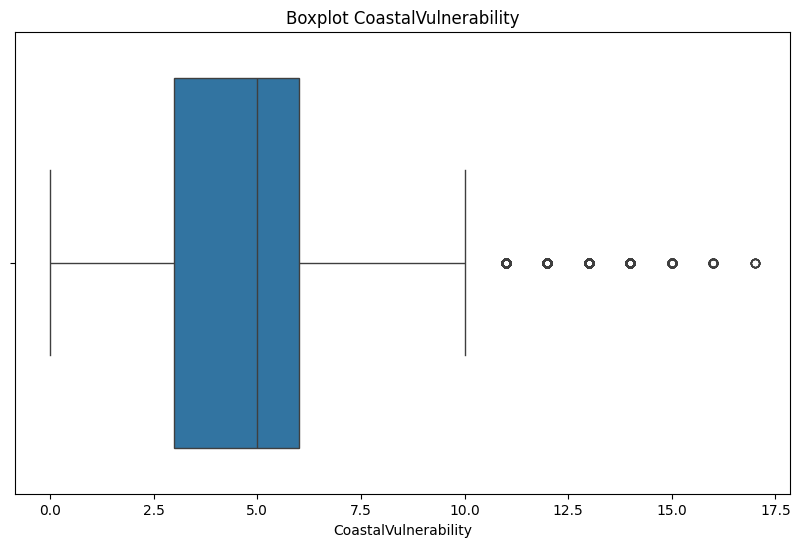

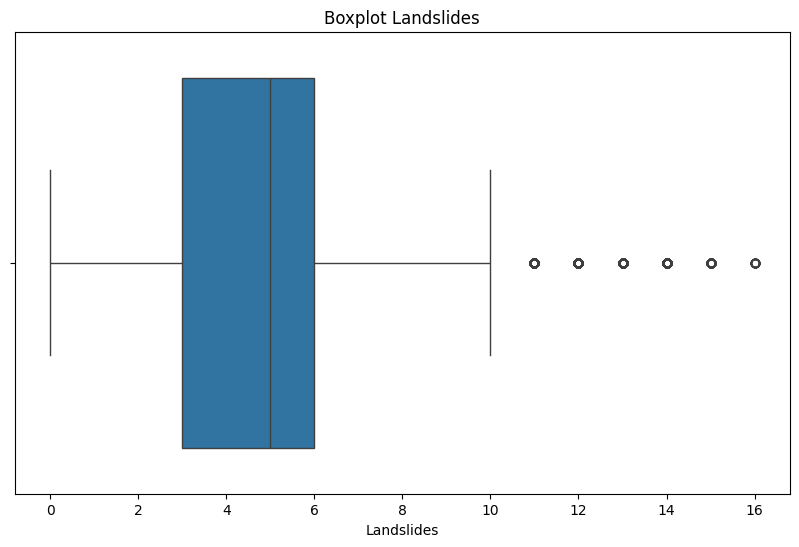

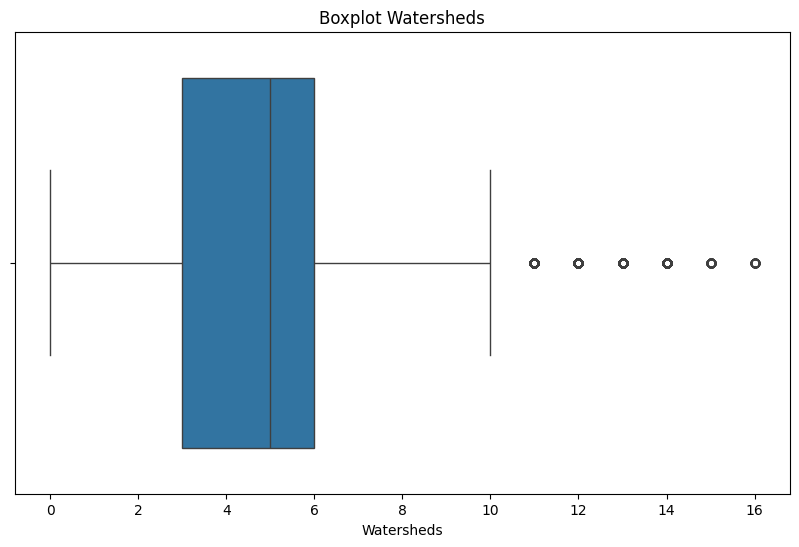

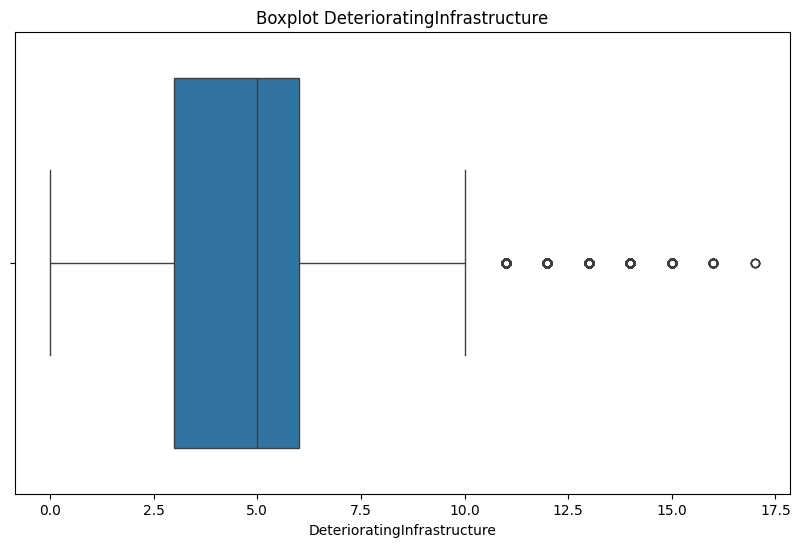

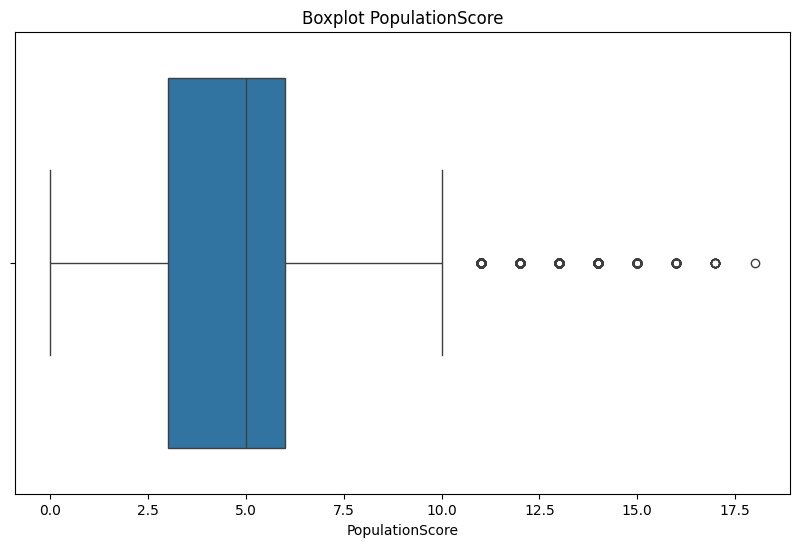

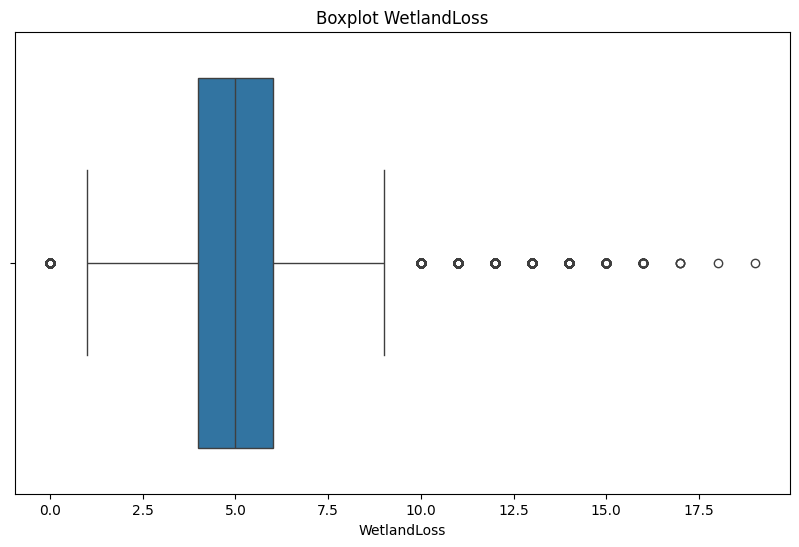

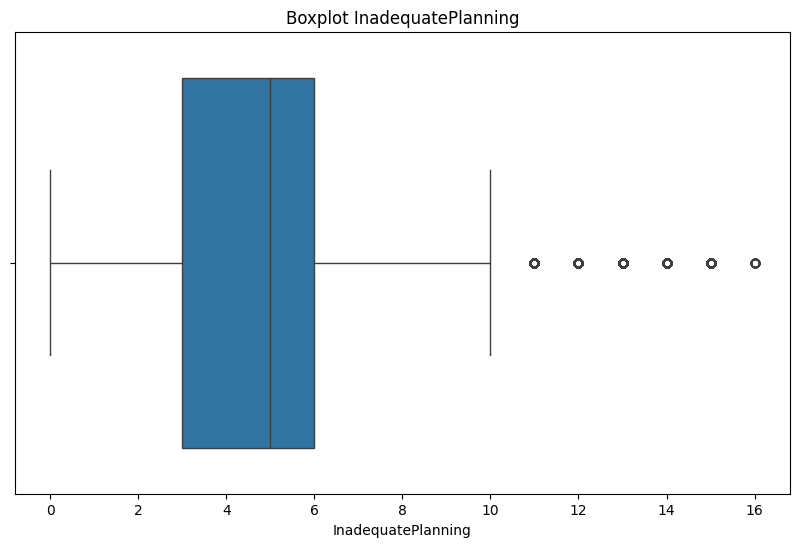

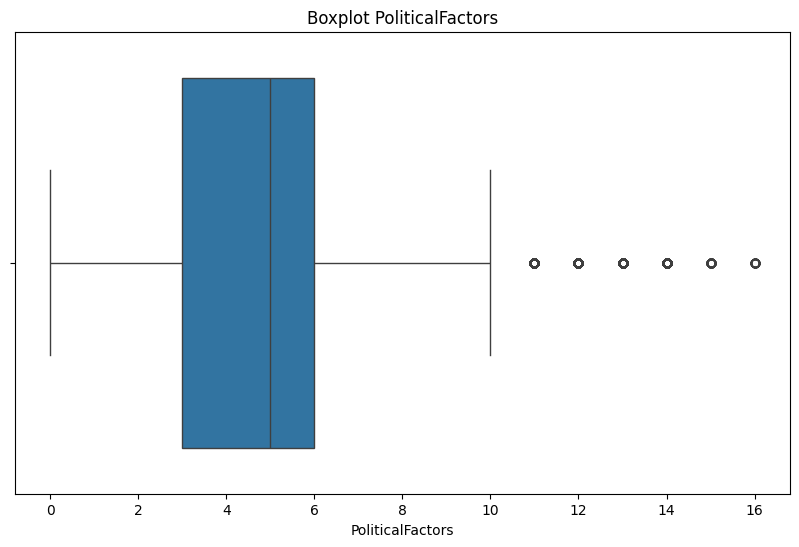

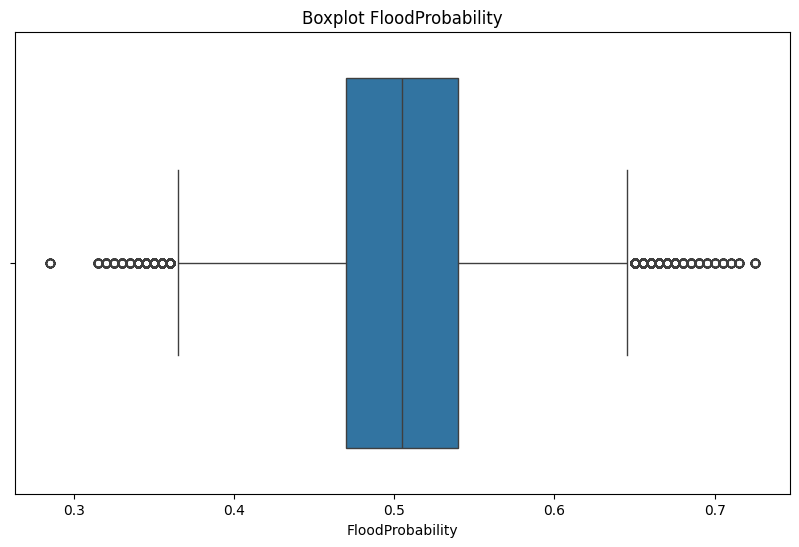

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for feature in df_train.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df_train[feature])
  plt.title(f"Boxplot {feature}")
  plt.show()

Ada dua pilihan dalam mengatasi Outlier yaitu
1. Memilih untuk menghapus bagian outlier tersebut
2. Mengganti dengan outliers tersebut dengan nilai yang lebih dekat atau mentransformasikannya

Disini kita akan memilih untuk menghapusnya

In [ ]:
# Memulai pemeriksaan dengan menggunakan IQR
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

# Menyimpan yang tidak termasuk outliers ke dataframe
condition = - ((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)
df = df_train.loc[condition, df_train.columns]


**Periksa hasil pembersihan Outlier**

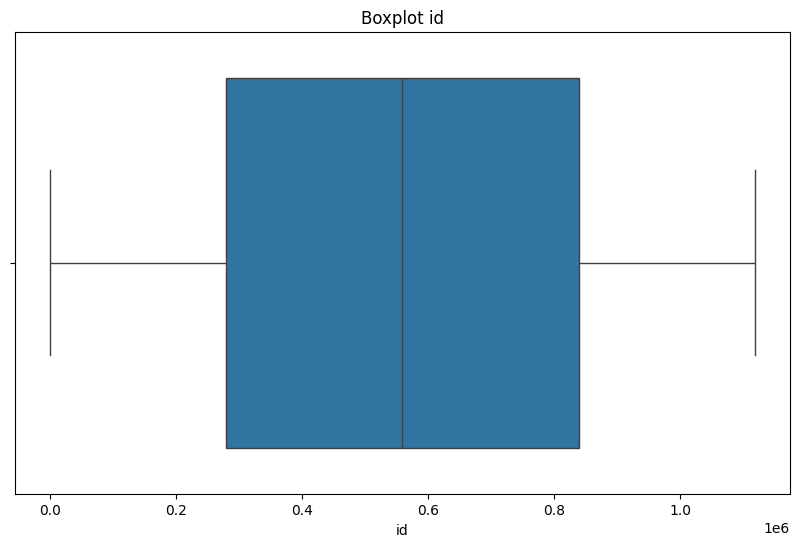

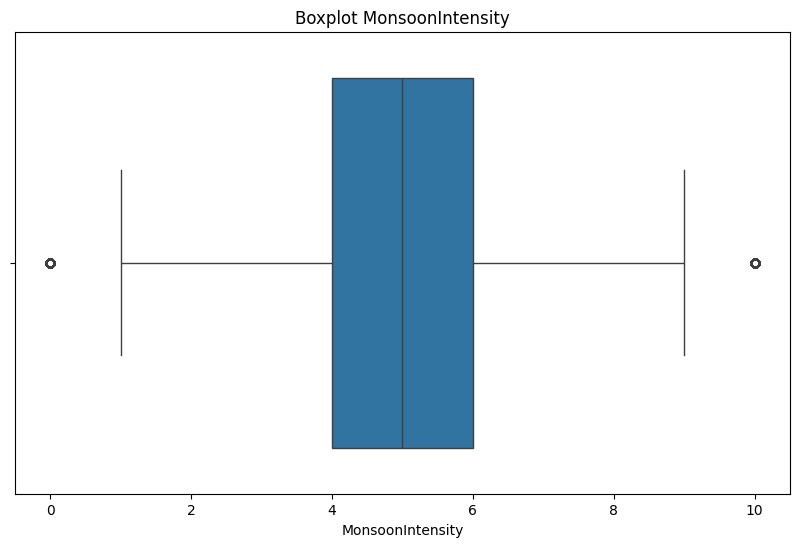

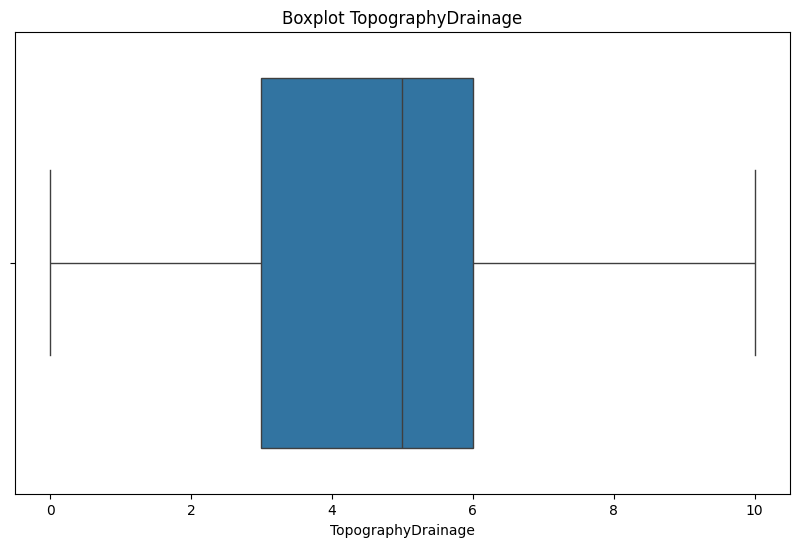

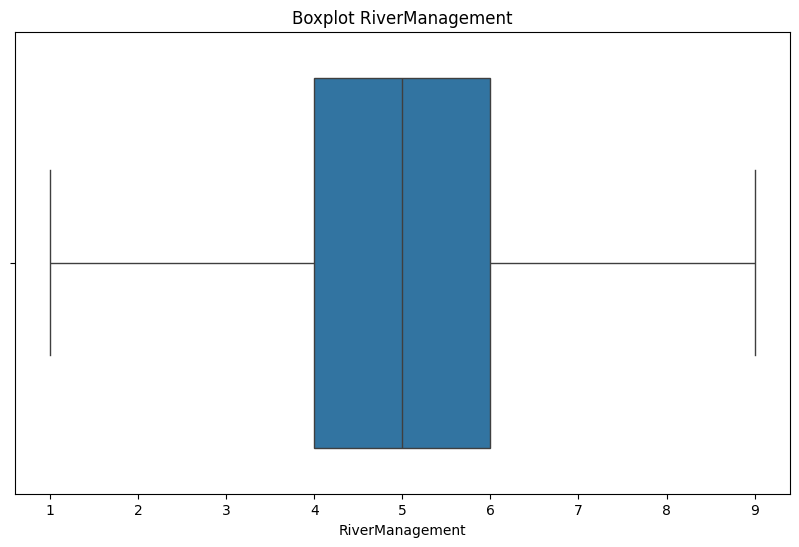

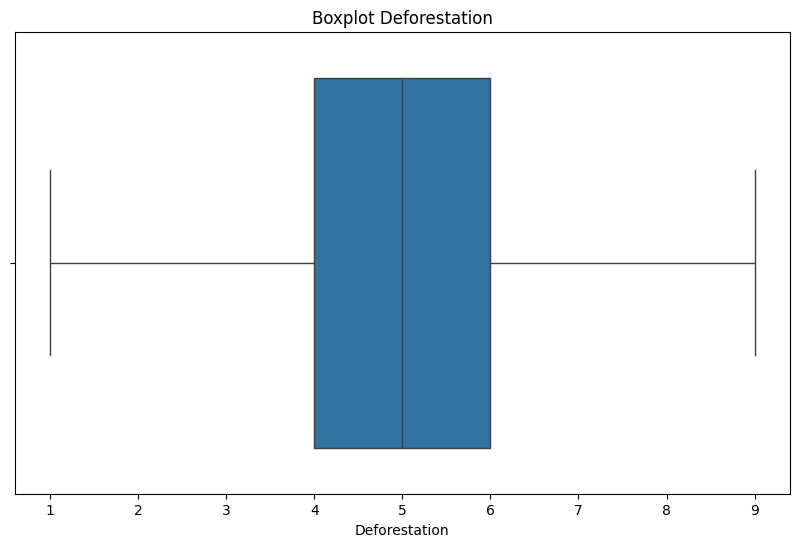

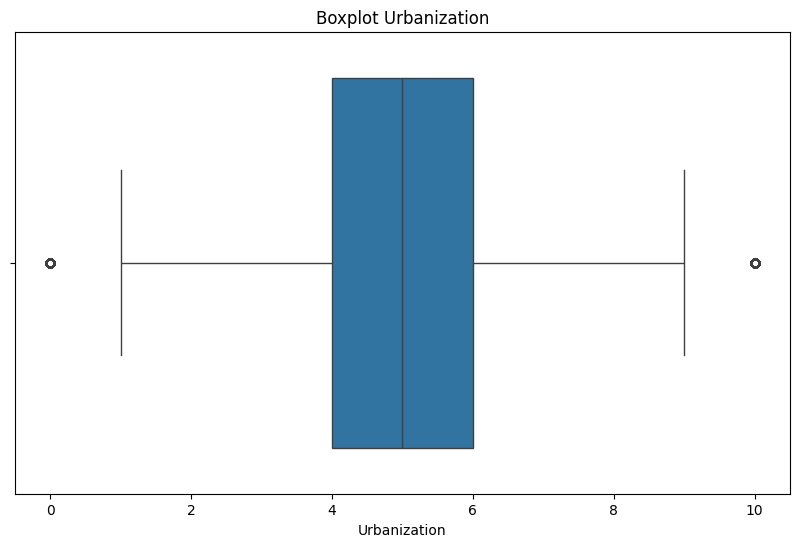

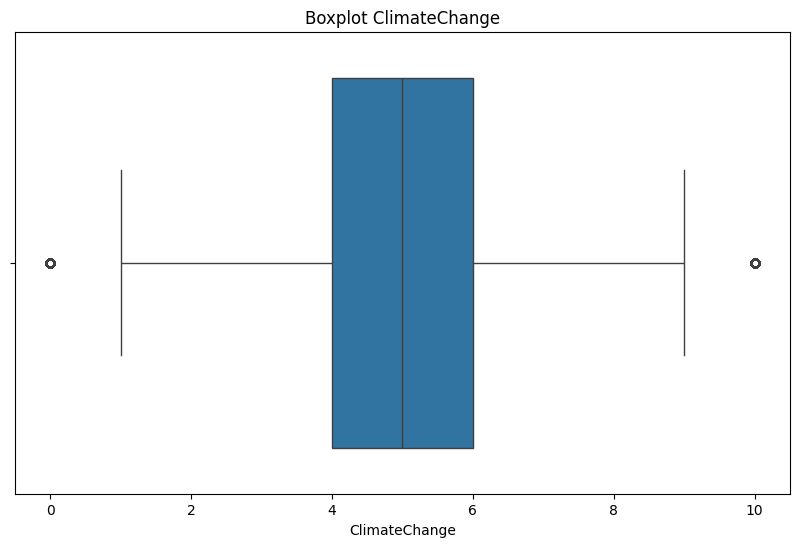

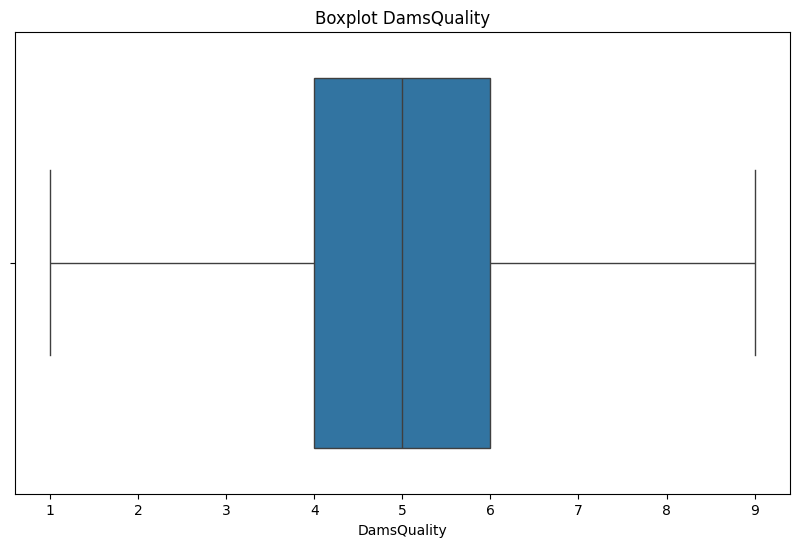

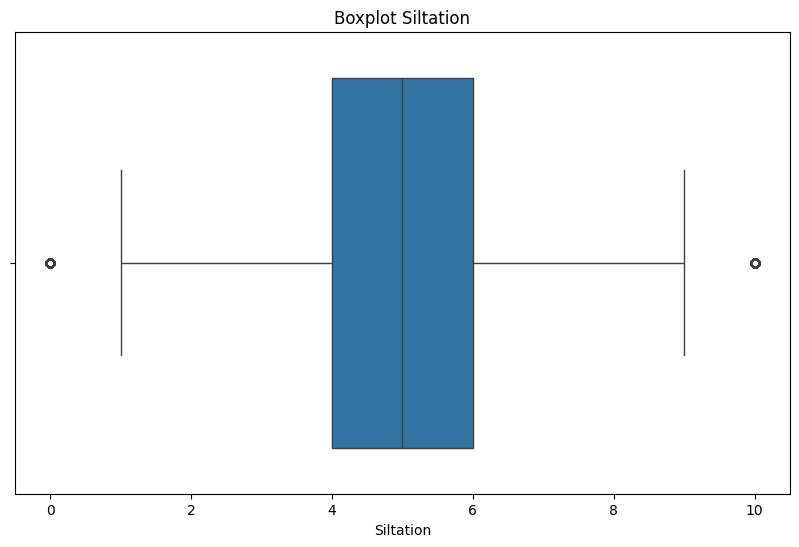

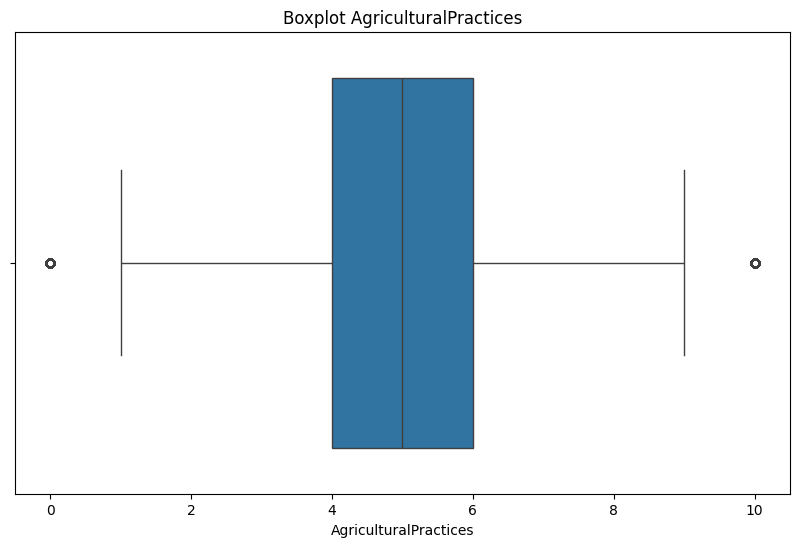

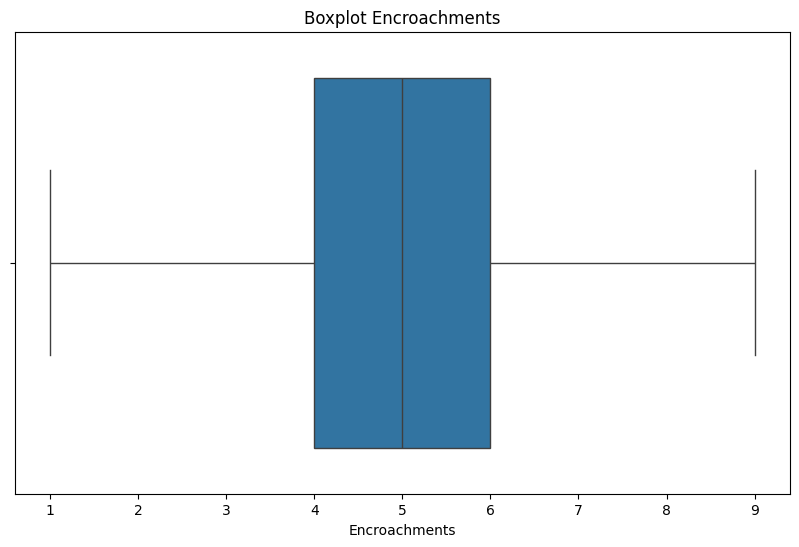

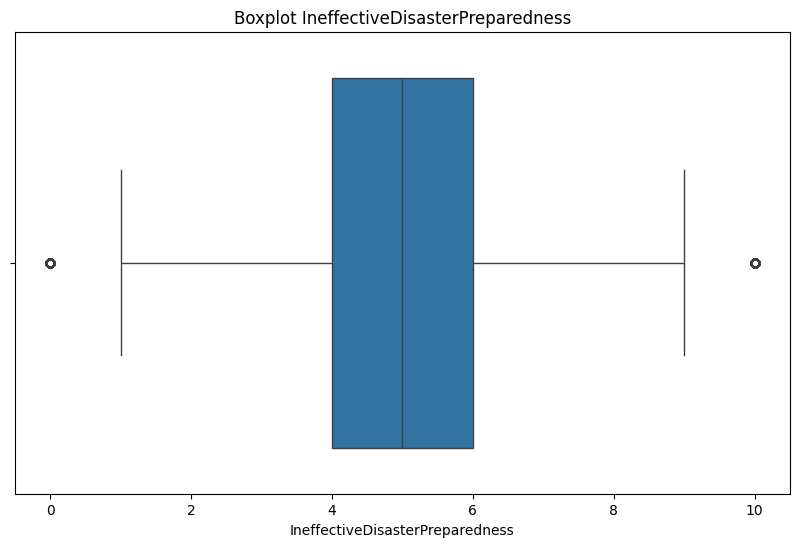

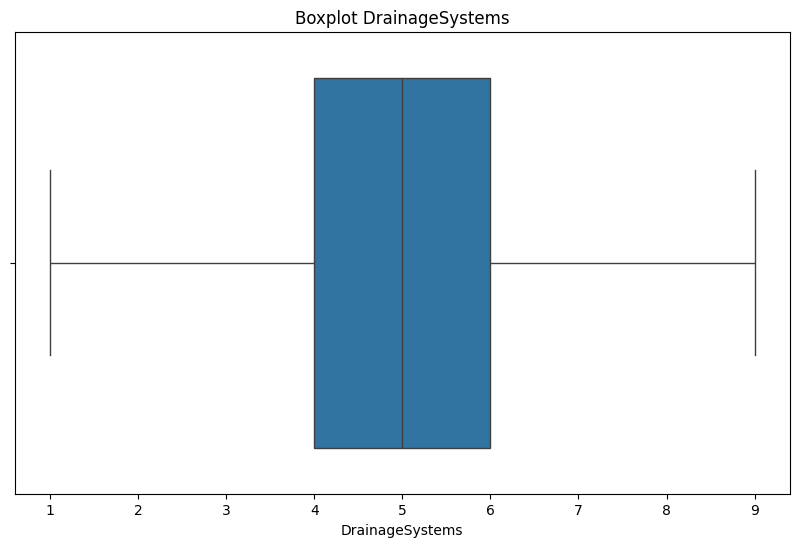

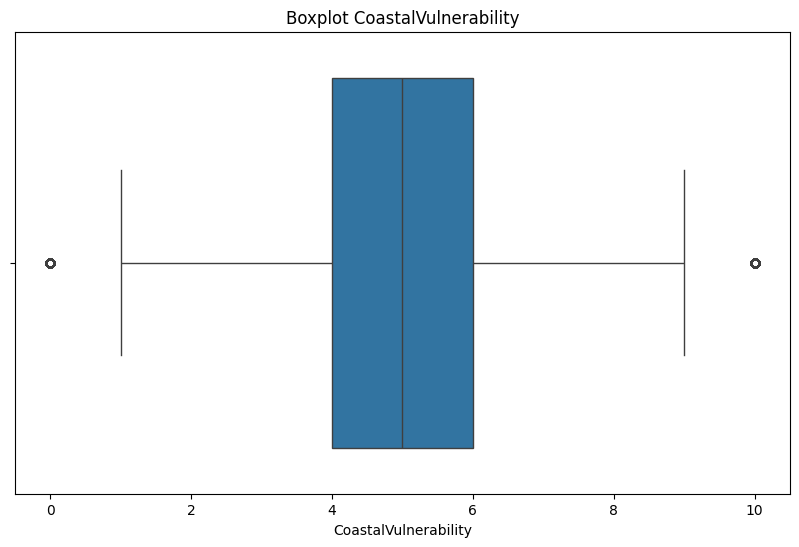

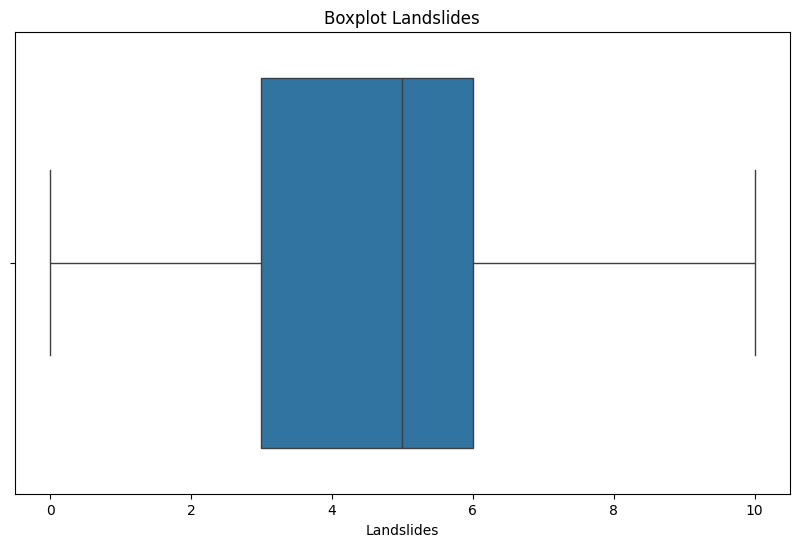

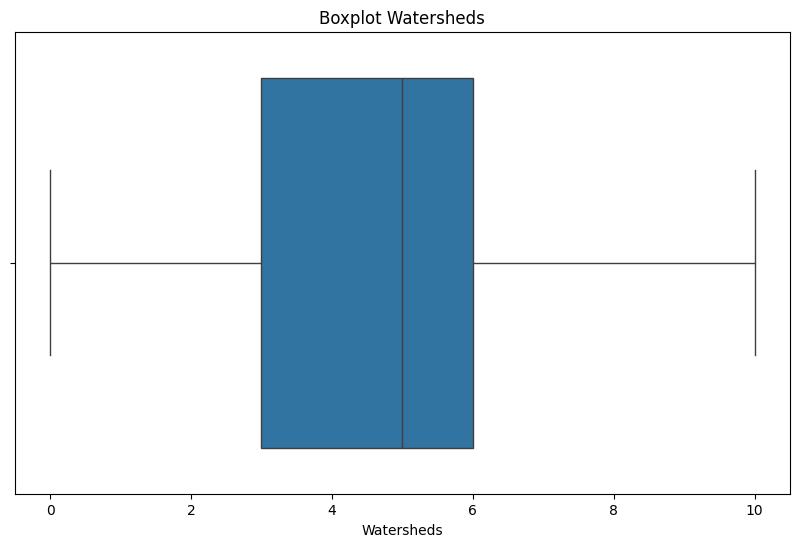

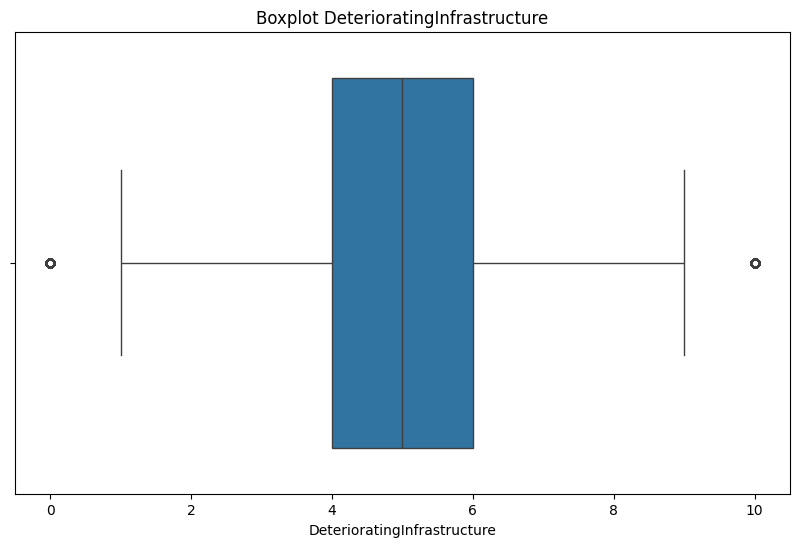

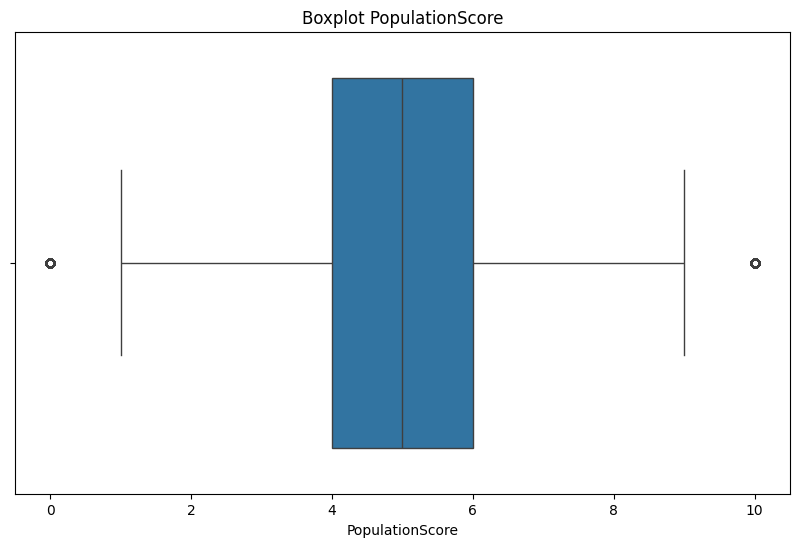

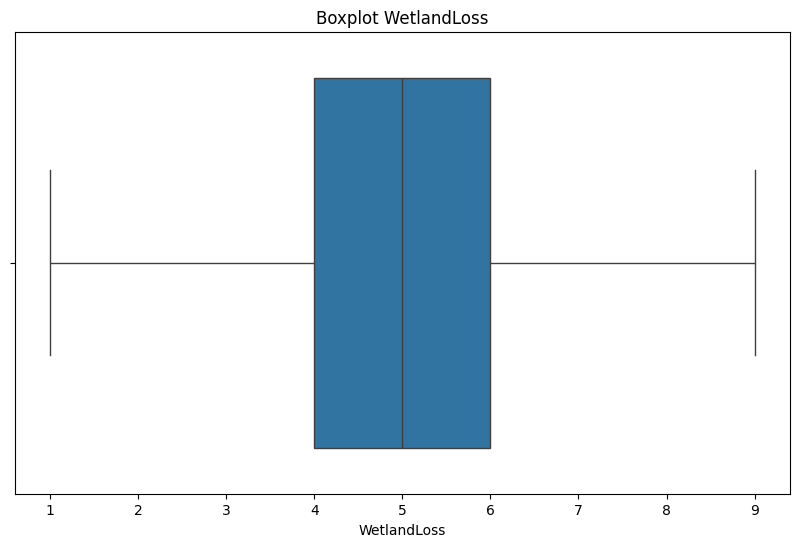

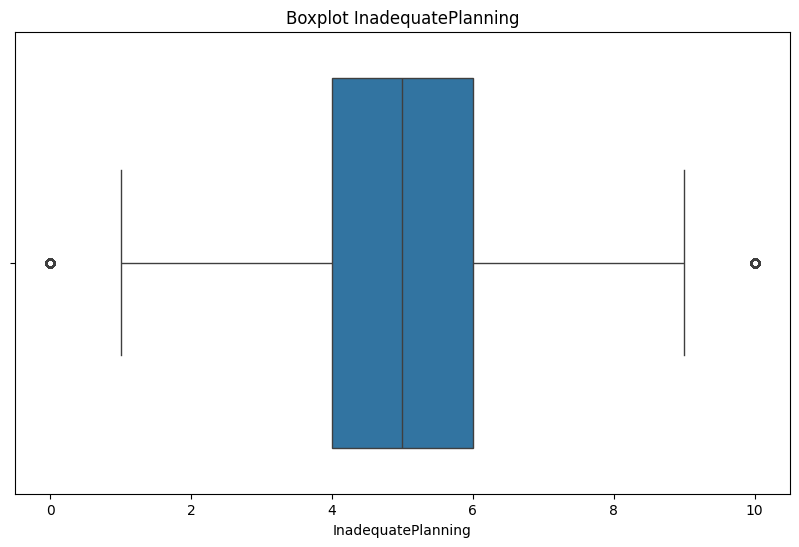

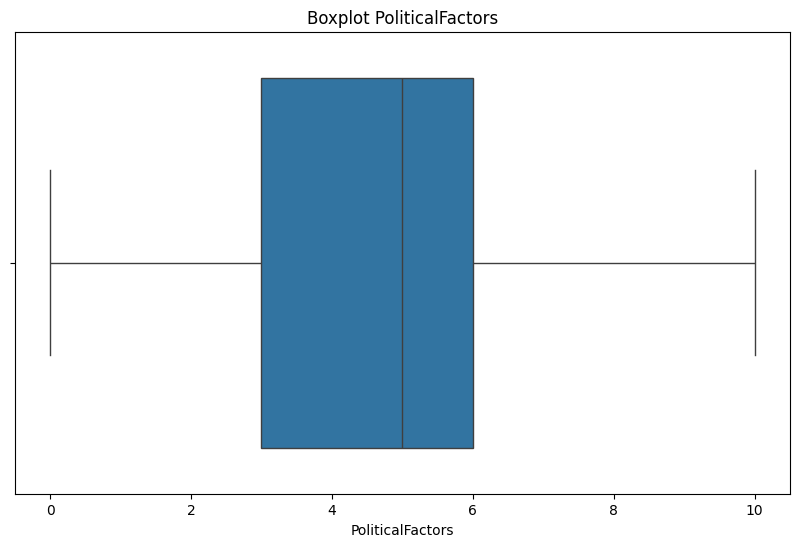

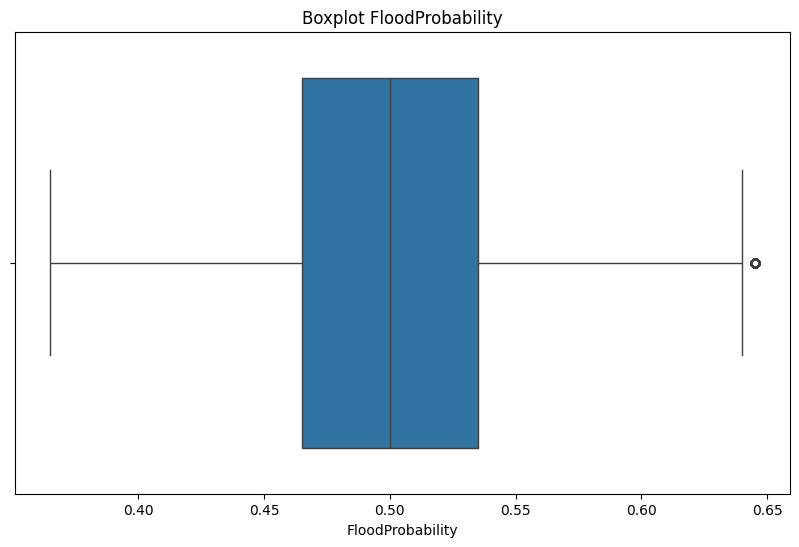

In [ ]:
for feature in df.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[feature])
  plt.title(f"Boxplot {feature}")
  plt.show()

Setelah itu , melakukan standardisasi pada hasil outlier

In [ ]:
# Menggunakan library StandardScaler
from sklearn.preprocessing import StandardScaler

# Memastikan data numerik yang akan diproses
numeric_features = df.select_dtypes(include=['number']).columns
numeric_features

# Standarisasi
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

Mengecek Duplikasi

In [ ]:
duplicates = df.duplicated()
print(f"Jumlah Baris Duplikat : {duplicates.sum()}")

print('Baris Duplikat : ')
print(df[duplicates])


Jumlah Baris Duplikat : 0
Baris Duplikat : 
Empty DataFrame
Columns: [id, MonsoonIntensity, TopographyDrainage, RiverManagement, Deforestation, Urbanization, ClimateChange, DamsQuality, Siltation, AgriculturalPractices, Encroachments, IneffectiveDisasterPreparedness, DrainageSystems, CoastalVulnerability, Landslides, Watersheds, DeterioratingInfrastructure, PopulationScore, WetlandLoss, InadequatePlanning, PoliticalFactors, FloodProbability]
Index: []

[0 rows x 22 columns]


EXPLORATORY DAN EXPLANATORY DATA
-
---


In [ ]:
df.describe(include='all')


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,...,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05
mean,3.128825e-16,-1.722920e-16,-8.252983e-18,-1.122910e-16,-1.138030e-16,-1.484907e-17,1.193637e-16,1.572309e-16,-1.516197e-17,1.194309e-16,...,-2.232715e-17,-1.108210e-16,-1.940060e-16,-1.644633e-16,-2.222467e-16,5.821188e-17,1.895708e-16,1.429887e-16,-7.076985e-17,-6.328547e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.732268e+00,-2.503498e+00,-2.449018e+00,-2.065325e+00,-2.080702e+00,-2.472198e+00,-2.500029e+00,-2.062896e+00,-2.487267e+00,-2.487272e+00,...,-2.066946e+00,-2.475094e+00,-2.465862e+00,-2.464520e+00,-2.485485e+00,-2.478098e+00,-2.067744e+00,-2.472204e+00,-2.463924e+00,-2.759991e+00
25%,-8.661751e-01,-4.542981e-01,-9.492630e-01,-4.681183e-01,-4.675365e-01,-4.615469e-01,-4.631232e-01,-4.656514e-01,-4.564057e-01,-4.636059e-01,...,-4.634462e-01,-4.649776e-01,-9.579532e-01,-9.577833e-01,-4.547982e-01,-4.547462e-01,-4.655010e-01,-4.602404e-01,-9.593186e-01,-7.136972e-01
50%,2.024918e-05,5.800187e-02,5.057361e-02,6.428396e-02,7.018534e-02,4.111574e-02,4.610324e-02,6.676350e-02,5.130956e-02,4.231074e-02,...,7.105385e-02,3.755159e-02,4.731955e-02,4.670802e-02,5.287338e-02,5.109174e-02,6.857993e-02,4.275047e-02,4.375149e-02,2.505596e-03
75%,8.661002e-01,5.703019e-01,5.504919e-01,5.966862e-01,6.079072e-01,5.437784e-01,5.553296e-01,5.991784e-01,5.590249e-01,5.482274e-01,...,6.055539e-01,5.400808e-01,5.499559e-01,5.489537e-01,5.605450e-01,5.569297e-01,6.026608e-01,5.457413e-01,5.452865e-01,7.187084e-01
max,1.732027e+00,2.619502e+00,2.550165e+00,2.193893e+00,2.221073e+00,2.554429e+00,2.592235e+00,2.196423e+00,2.589886e+00,2.571894e+00,...,2.209054e+00,2.550197e+00,2.560501e+00,2.557936e+00,2.591231e+00,2.580282e+00,2.204904e+00,2.557705e+00,2.551427e+00,2.969631e+00


Visualisasi Data agar terlihat bahwa distribusi datanya sudah cukup baik

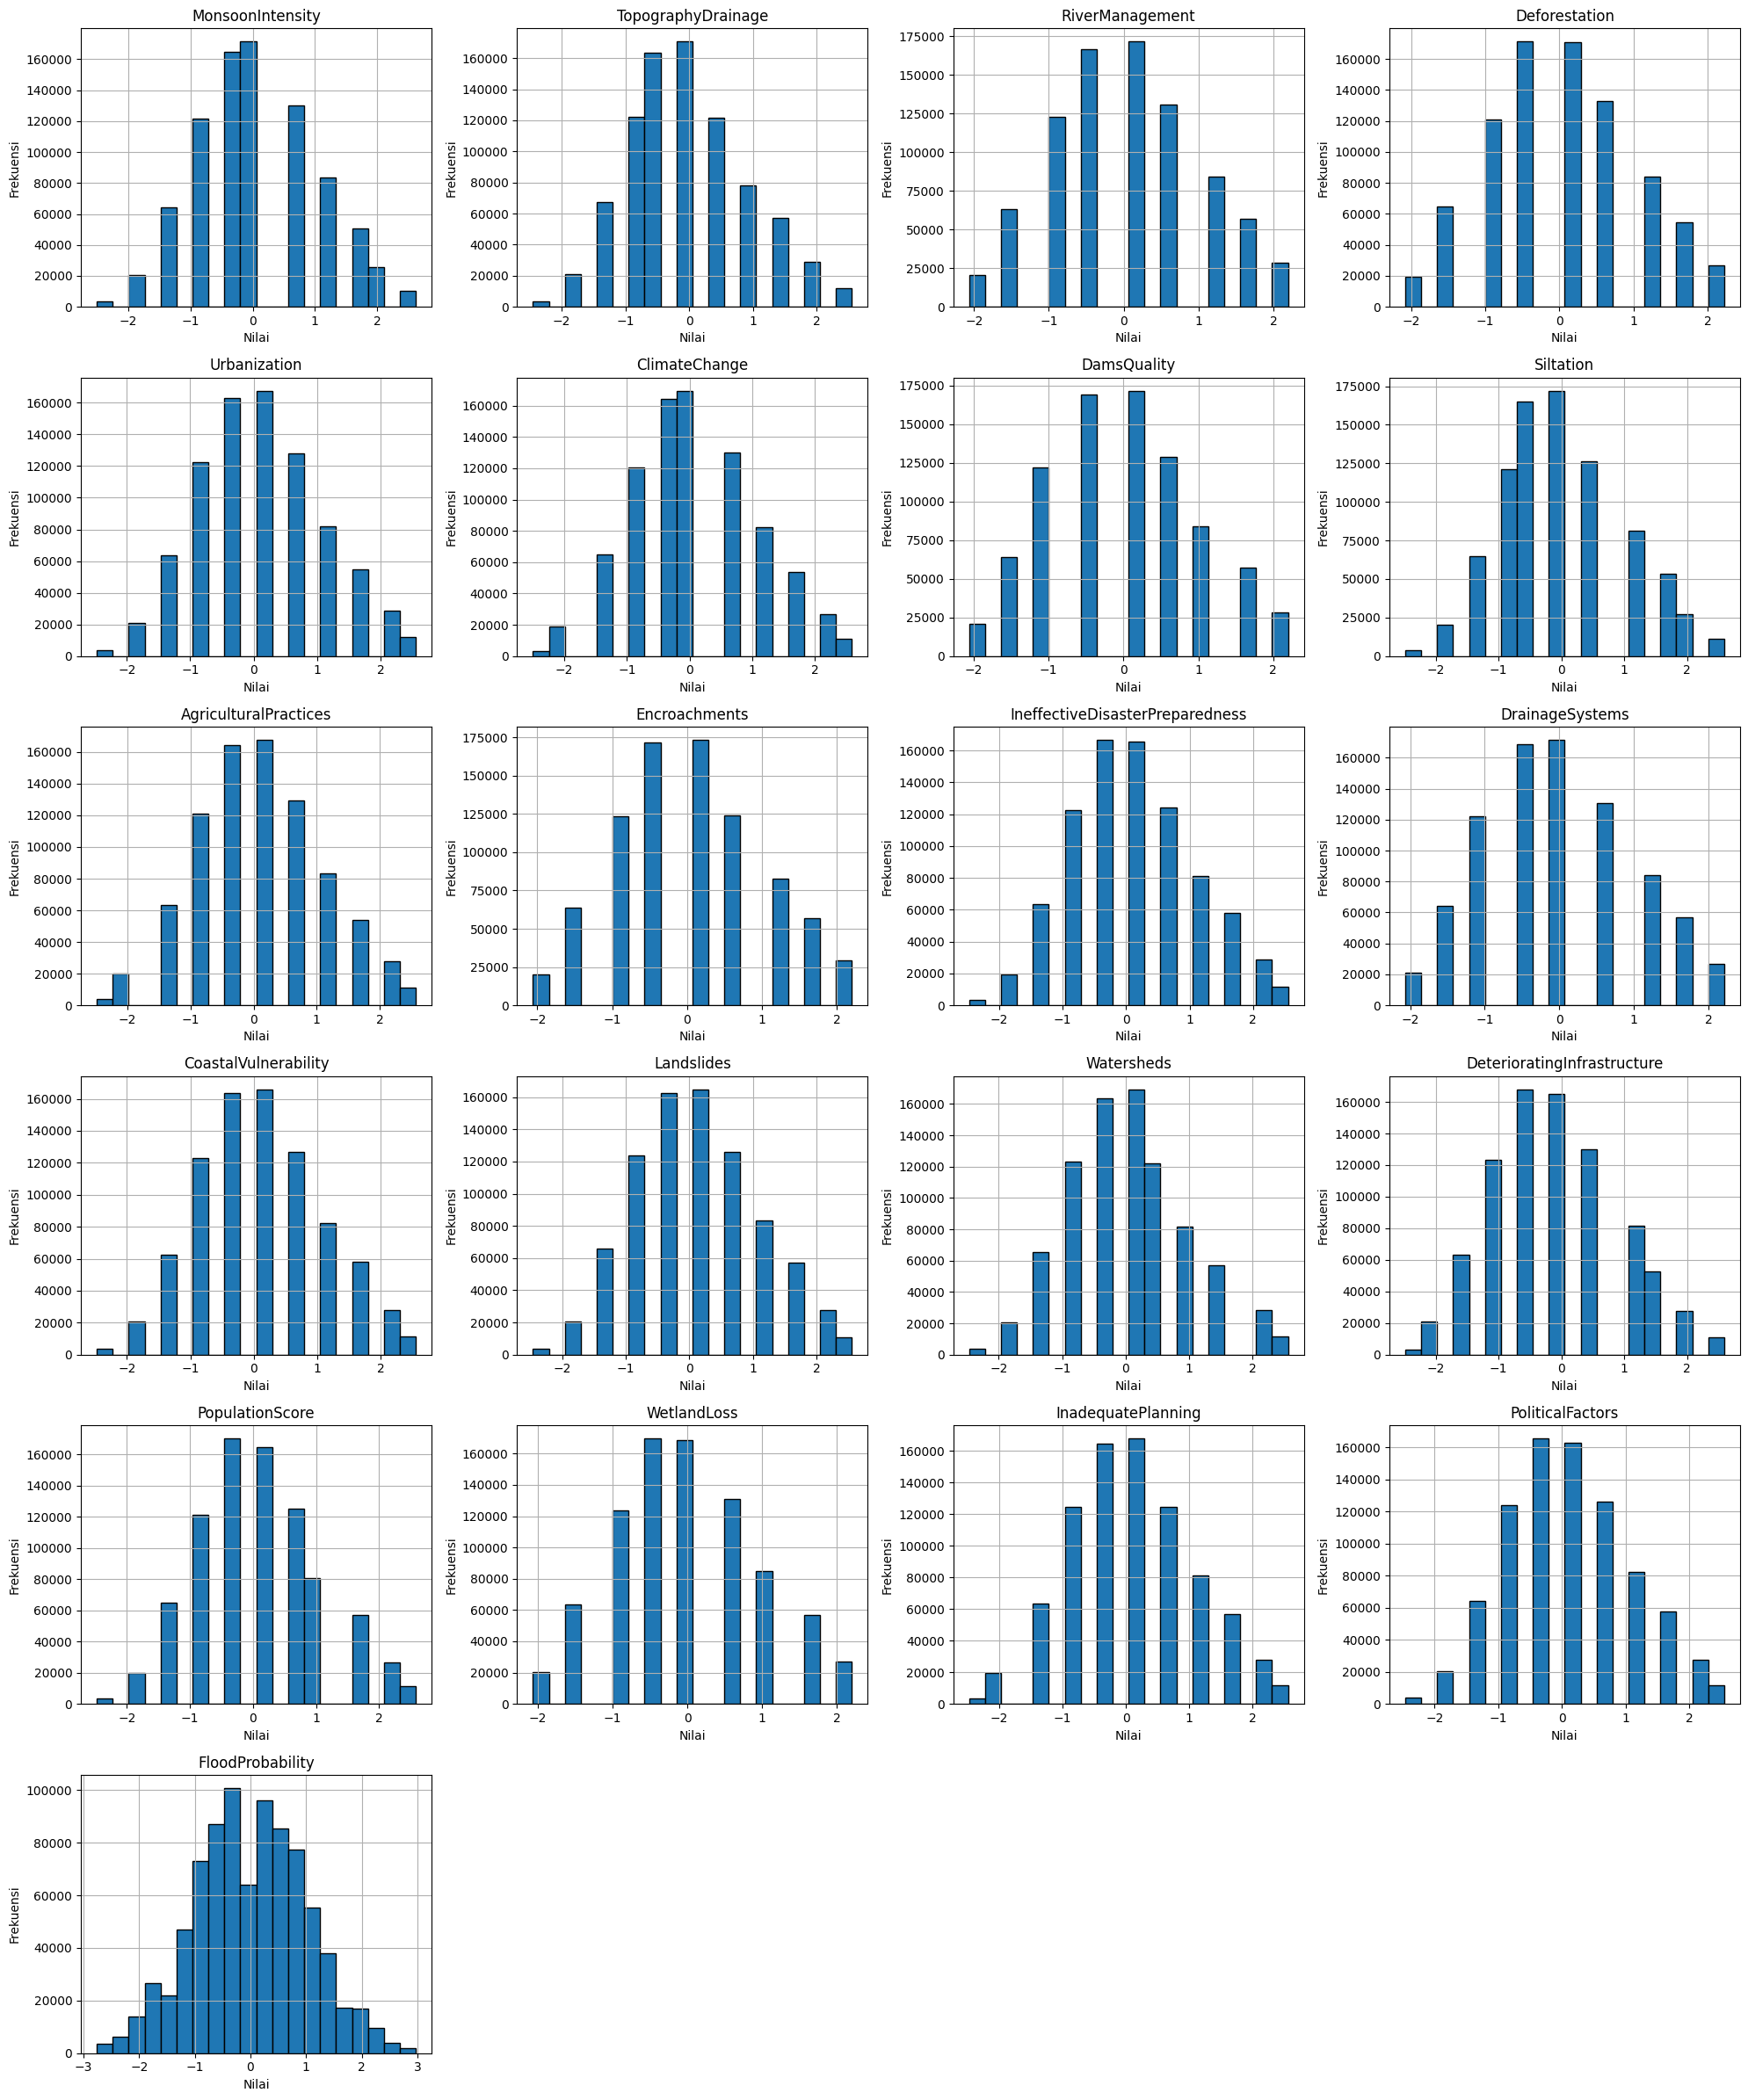

In [ ]:
# Menghitung Jumlah Variabel
num_vars = df.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4
n_rows = -(-num_vars // n_cols) # Untuk menentukan jumlah baris

# Membuat plot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df.drop(columns=['id']).columns):
  df[column].hist(ax=axes[i], bins=20, edgecolor='black')
  axes[i].set_title(column)
  axes[i].set_xlabel('Nilai')
  axes[i].set_ylabel('Frekuensi')

# Menghapus subplot yang tidak digunakan
for i in range(i+1, len(axes)):
  fig.delaxes(axes[i])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()


Memilih fitur yang memiliki hubungan dengan fitur target atau FoodProbability

In [ ]:
df = df.drop(columns=['id'])

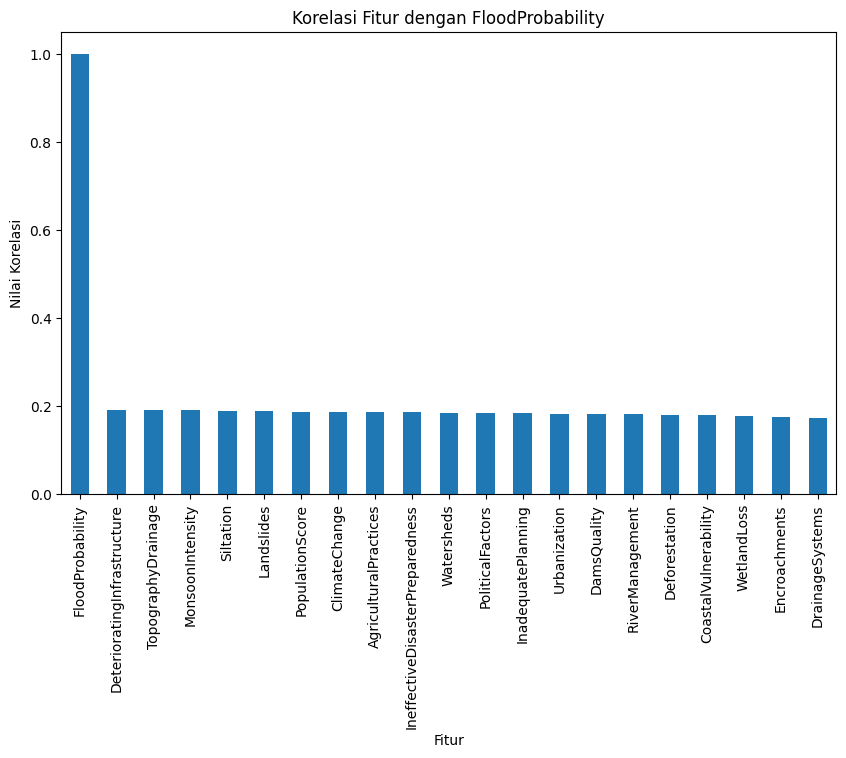

In [ ]:
target_corr = df.corr()['FloodProbability']

# Mengurutkan berdasarkan kekuatan korelasinya
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(10,6))
target_corr_sorted.plot(kind='bar')
plt.title('Korelasi Fitur dengan FloodProbability')
plt.xlabel('Fitur')
plt.ylabel('Nilai Korelasi')
plt.show()

Data Splitting
-
---

In [ ]:
import sklearn
from sklearn import datasets

# Memisahakan fitur (X) dan target (Y)
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']


from sklearn.model_selection import train_test_split
# Membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Menghitung panjang / jumlah data
print(f'Jumlah data : {len(X)}')
print(f'Jumlah data training : {len(X_train)}')
print(f'Jumlah data testing : {len(X_test)}')



Jumlah data : 845886
Jumlah data training : 676708
Jumlah data testing : 169178


MODELLING
-
---

- Menggunakan tiga algoritma yang berbeda ( LARS, Linear Regression, GBR )


**LARS**

In [ ]:
from sklearn import linear_model

lars = linear_model.Lars(n_nonzero_coefs=1).fit(X_train, y_train)

pred_lars = lars.predict(X_test)


In [ ]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

In [ ]:
print(f"MAE : {mae_lars}")
print(f"MSE : {mse_lars}")
print(f"R2 : {r2_lars}")


MAE : 0.8064965862112844
MSE : 0.9982455301765661
R2 : 0.0007638833508322174


Agar dapat membandingkan ketiga model yang dibangun buatlah DataFrame


In [ ]:
# Membuat Dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}

# Konversi dictionary menjadi DataFrame
df_result = pd.DataFrame(data, index=['LARS'])
df_result

,MAE,MSE,R2
LARS,0.806497,0.998246,0.000764


**LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)
r2_lr = r2_score(y_test, pred_lr)

print(f"MAE : {mae_lr}")
print(f"MSE : {mse_lr}")
print(f"R2 : {r2_lr}")

MAE : 0.3291416529981243
MSE : 0.1712951124823055
R2 : 0.8285349066701793


In [ ]:
df_result.loc['Linear Regression'] = [mae_lr, mse_lr, r2_lr]
df_result

,MAE,MSE,R2
LARS,0.806497,0.998246,0.000764
Linear Regression,0.329142,0.171295,0.828535


**GRADIENT BOOSTING REGRESSOR**

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=184)
gbr.fit(X_train, y_train)

pred_gbr = gbr.predict(X_test)

mae_gbr = mean_absolute_error(y_test, pred_gbr)
mse_gbr = mean_squared_error(y_test, pred_gbr)
r2_gbr = r2_score(y_test, pred_gbr)

print(f"MAE : {mae_gbr}")
print(f"MSE : {mse_gbr}")
print(f"R2 : {r2_gbr}")


MAE : 0.5126715936448324
MSE : 0.3804907514322631
R2 : 0.6191316771387397


In [33]:
df_result.loc['Gradient Boosting Regressor'] = [mae_gbr, mse_gbr, r2_gbr]
df_result

,MAE,MSE,R2
LARS,0.806497,0.998246,0.000764
Linear Regression,0.329142,0.171295,0.828535
Gradient Boosting Regressor,0.512672,0.380491,0.619132


- Algoritma Linear Regression memiliki nilai evaluasi yang lebih baik jika dibandingkan dengan yang lain
- Data yang digunakan memiliki hubungan sederhana antara fitur dan target atau bisa disebut linearitas.- Jika hubungan antara fitur dan target bersifat linear atau hampir linear, Linear Regression mungkin akan bekerja lebih baik. Linear Regression didesain untuk menangani hubungan linear secara optimal dan tidak membutuhkan model yang kompleks untuk menemukan pola tersebut.